<a href="https://colab.research.google.com/github/JonasSouza871/Estatistica_python/blob/main/Testando_rela%C3%A7%C3%B5es_e_prevendo_resultados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Análise preliminares

--------------------------------

## 1.1. Conhecendo o dataset


-----------------

- importando as bibliotecas

In [96]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

- Dataset que será utilizado: Consumo de cerveja na cidade de São Paulo

- Link do dataset com as informações : https://www.kaggle.com/datasets/dongeorge/beer-consumption-sao-paulo

- Dados do dataset:

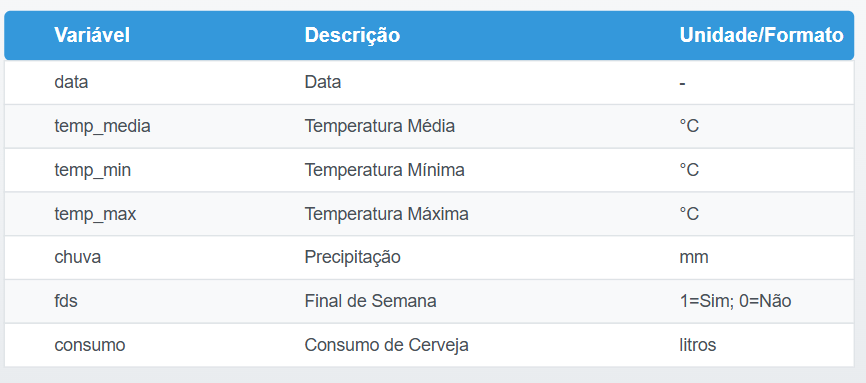

In [97]:
dados = pd.read_csv('Consumo_cerveja.csv')
dados.head()

,data;temp_media;temp_min;temp_max;chuva;fds;consumo
0,01/01/2015;27.3;23.9;32.5;0;0;25461
1,02/01/2015;27.02;24.5;33.5;0;0;28972
2,03/01/2015;24.82;22.4;29.9;0;1;30814
3,04/01/2015;23.98;21.5;28.6;1.2;1;29799
4,05/01/2015;23.82;21;28.3;0;0;28900


- vemos um problema nos dados pois esta utilizando , (comum aqui no brasil) porém não utilizado fora, e a linguagem tambem não interpreta isso como decimal. Além de que os dados tambem estao separado por ;

In [98]:
dados = pd.read_csv('Consumo_cerveja.csv',sep = ';') #organizado
dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


In [99]:
dados.shape #quantidade de linhas (365 dias)
# quantidade de colunas, tipos de dados mostrado na tabela SVG acima

(365, 7)

## 1.2. Análise preliminares

--------------

In [100]:
dados.describe()# informação sobre os dados

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25401.367123
std,3.180108,2.826185,4.317366,12.417844,0.452001,4399.142703
min,12.900000,10.600000,14.500000,0.000000,0.000000,14343.000000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22008.000000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24867.000000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28631.000000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37937.000000


- Aplicando a matriz de correlação, iremos obter o coeficiente de correlação que indica o qual associado linearmente estão dois termos

- Eliminado a data do dataset:

In [101]:
dados = dados.drop('data',axis = 1)
dados.head()

,temp_media,temp_min,temp_max,chuva,fds,consumo
0,27.30,23.9,32.5,0.0,0,25461
1,27.02,24.5,33.5,0.0,0,28972
2,24.82,22.4,29.9,0.0,1,30814
3,23.98,21.5,28.6,1.2,1,29799
4,23.82,21.0,28.3,0.0,0,28900


In [102]:
dados.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


- vemos uma boa relação linear entre cosumo e a temperatura máxima e tambem fim de semana.

- Temperatura máxima e consumo tem uma alta releção linear

# 2. Comportamento da variável dependente

----

## 2.1. Comportamente da variável dependente

------------

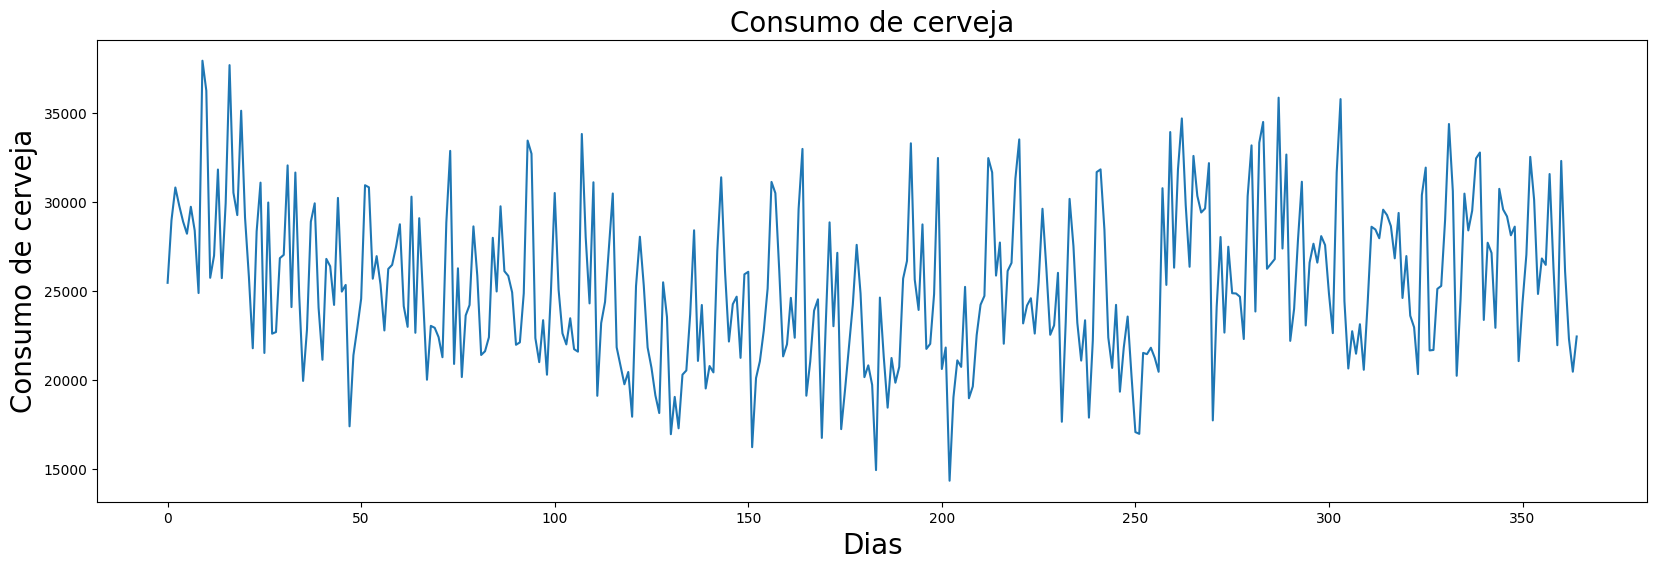

In [103]:
fig,  ax = plt.subplots(figsize=(20,6)) #tamanho da figura

ax = dados['consumo'].plot() ##plot
ax.set_ylabel('Consumo de cerveja',fontsize = 20)
ax.set_xlabel('Dias',fontsize = 20)
ax.set_title('Consumo de cerveja', fontsize = 20)
plt.show()

## 2.2. Utilizando boxplot

-----

- O boxplot é um gráfico estatístico que visualiza a distribuição de dados numéricos através de cinco medidas essenciais: mínimo, primeiro quartil (Q1), mediana (Q2), terceiro quartil (Q3) e máximo, onde a caixa central representa o intervalo interquartil (contendo 50% dos dados centrais) com uma linha interna marcando a mediana, enquanto os bigodes se estendem até os valores não atípicos dentro de 1,5 vezes o intervalo interquartil, e pontos isolados fora desses limites indicam outliers, valores que se desviam significativamente do padrão da distribuição.

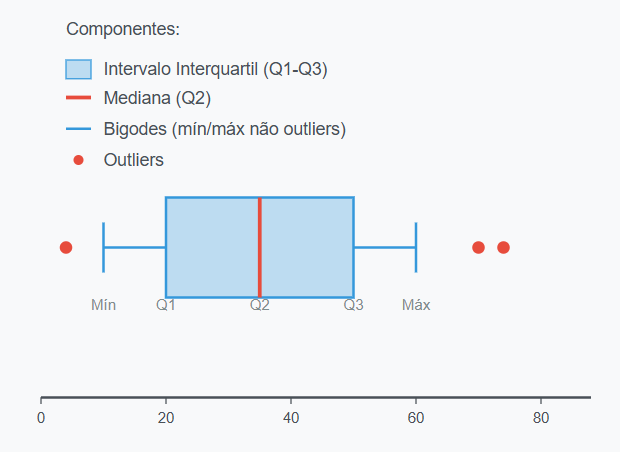

- onde Q1 = 25% dos dados , Q3 = 75% e Q2 sendo a mediana.

- Esses boxplot normalmente são plotados utilizando o seaborn

- Boxplot para o consumo de alcool - variavel dependente (Y) do nosso projeto
- as outras variaveis são independentes que contribuem para a função de consumo.

In [104]:
import seaborn as sns

In [106]:
dados = pd.DataFrame(dados) #transforma dados em dataframe
dados.head()

,temp_media,temp_min,temp_max,chuva,fds,consumo
0,27.30,23.9,32.5,0.0,0,25461
1,27.02,24.5,33.5,0.0,0,28972
2,24.82,22.4,29.9,0.0,1,30814
3,23.98,21.5,28.6,1.2,1,29799
4,23.82,21.0,28.3,0.0,0,28900


<Axes: xlabel='consumo'>

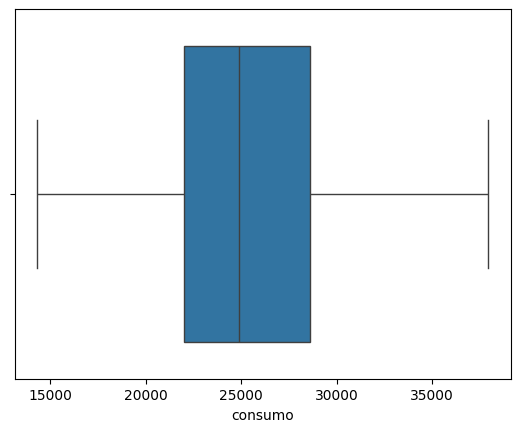

In [108]:
sns.boxplot(data=dados['consumo'],orient= 'h') #o parametro orient h  deixa na horizontal os dados

- Não apresenta outliers.
- Mediana um pouco abaixo do esperado, porem nada tão estranho.

Text(0.5, 0, 'Litros')

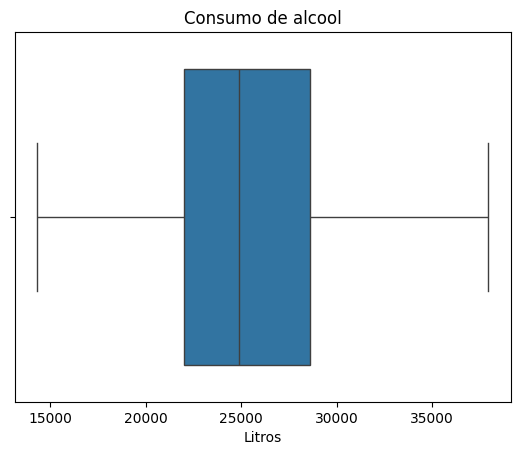

In [112]:
ax = sns.boxplot(data=dados['consumo'],orient= 'h')
ax.set_title('Consumo de alcool')
ax.set_xlabel('Litros')

## 2.3. Boxplot de duas variáveis

----------

- Comparar em boxplots o consumo no fim se semana e sem fim de semana:

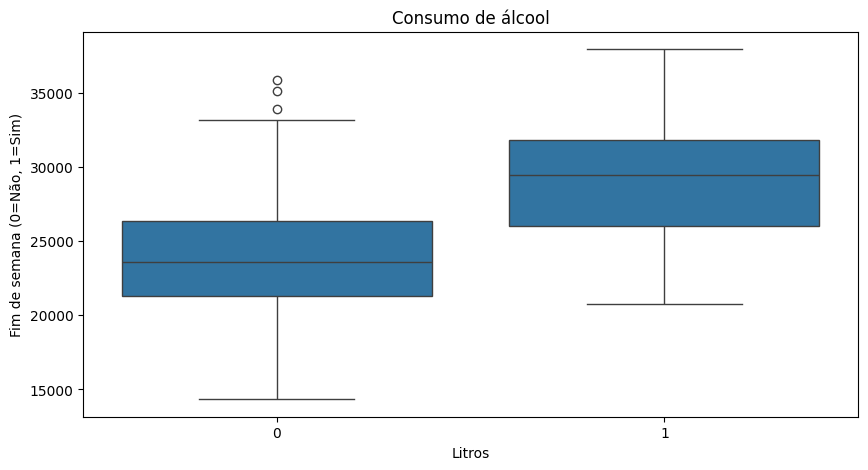

In [123]:
ax = sns.boxplot(x='fds', y='consumo', data=dados, orient='v')
ax.figure.set_size_inches(10,5)
ax.set_title('Consumo de álcool')
ax.set_xlabel('Litros')
ax.set_ylabel('Fim de semana (0=Não, 1=Sim)')  # exemplo se fds for categórica
plt.show()

- vemnos na imagem que com o fim de semana o consumo é bem maior, com a mediana perto de 30k litros enquanto sem fim de semana fica perto de 23k.

- Alguns outliers de altos valores fora de fim de semana (feriados)

In [136]:
dados_filtrados = dados[(dados['fds'] == 0) & (dados['consumo'] > 30000)] #dias da semana com alto consumo (estudar dps)
dados_filtrados.head()

,temp_media,temp_min,temp_max,chuva,fds,consumo
13,25.96,21.3,34.0,1.6,0,31825
19,27.68,23.3,35.6,0.6,0,35127
33,23.16,18.0,31.1,1.6,0,31655
63,24.42,19.7,31.6,0.0,0,30300
110,22.52,19.3,29.0,0.0,0,31108


## 2.4. Distribuição de Frequências
-----------

- verificando se comporta com distribuição normal.

-  verificando visualmente (grafico) apartir dos dados de consumo:

/tmp/ipython-input-3691013163.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['consumo'])


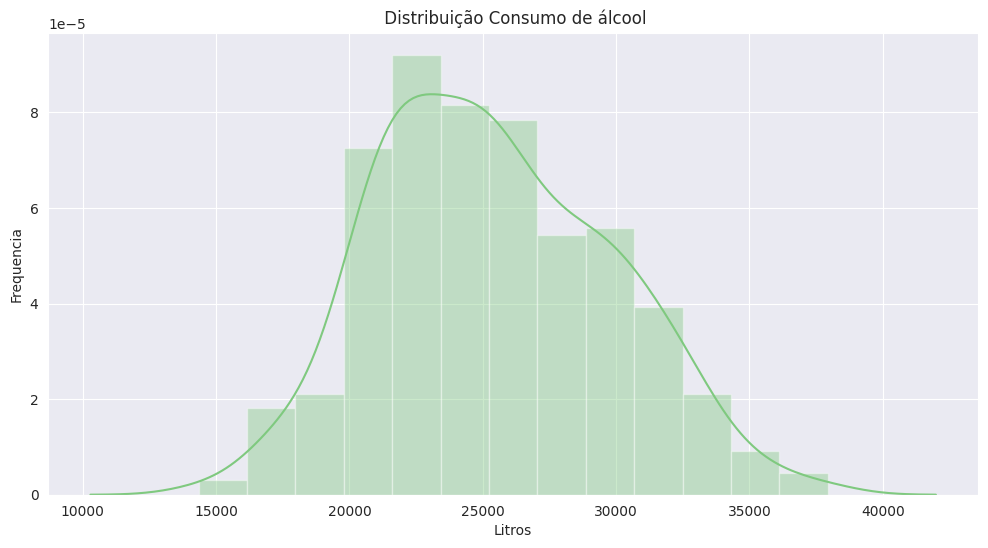

In [148]:
ax = sns.distplot(dados['consumo'])
ax.figure.set_size_inches(12,6)
ax.set_title(' Distribuição Consumo de álcool')
ax.set_xlabel('Litros')
ax.set(xlabel='Litros', ylabel='Frequencia')
plt.show()

- Apesar da deformação na queda, lembra uma normal.

# 3.Variável dependente vs Variáveis explicativas

-------------

## 3.1 Usando pairplot
----

- todos os tipos de graficos possíveis com base na combinaç~~ao de informações do dataset

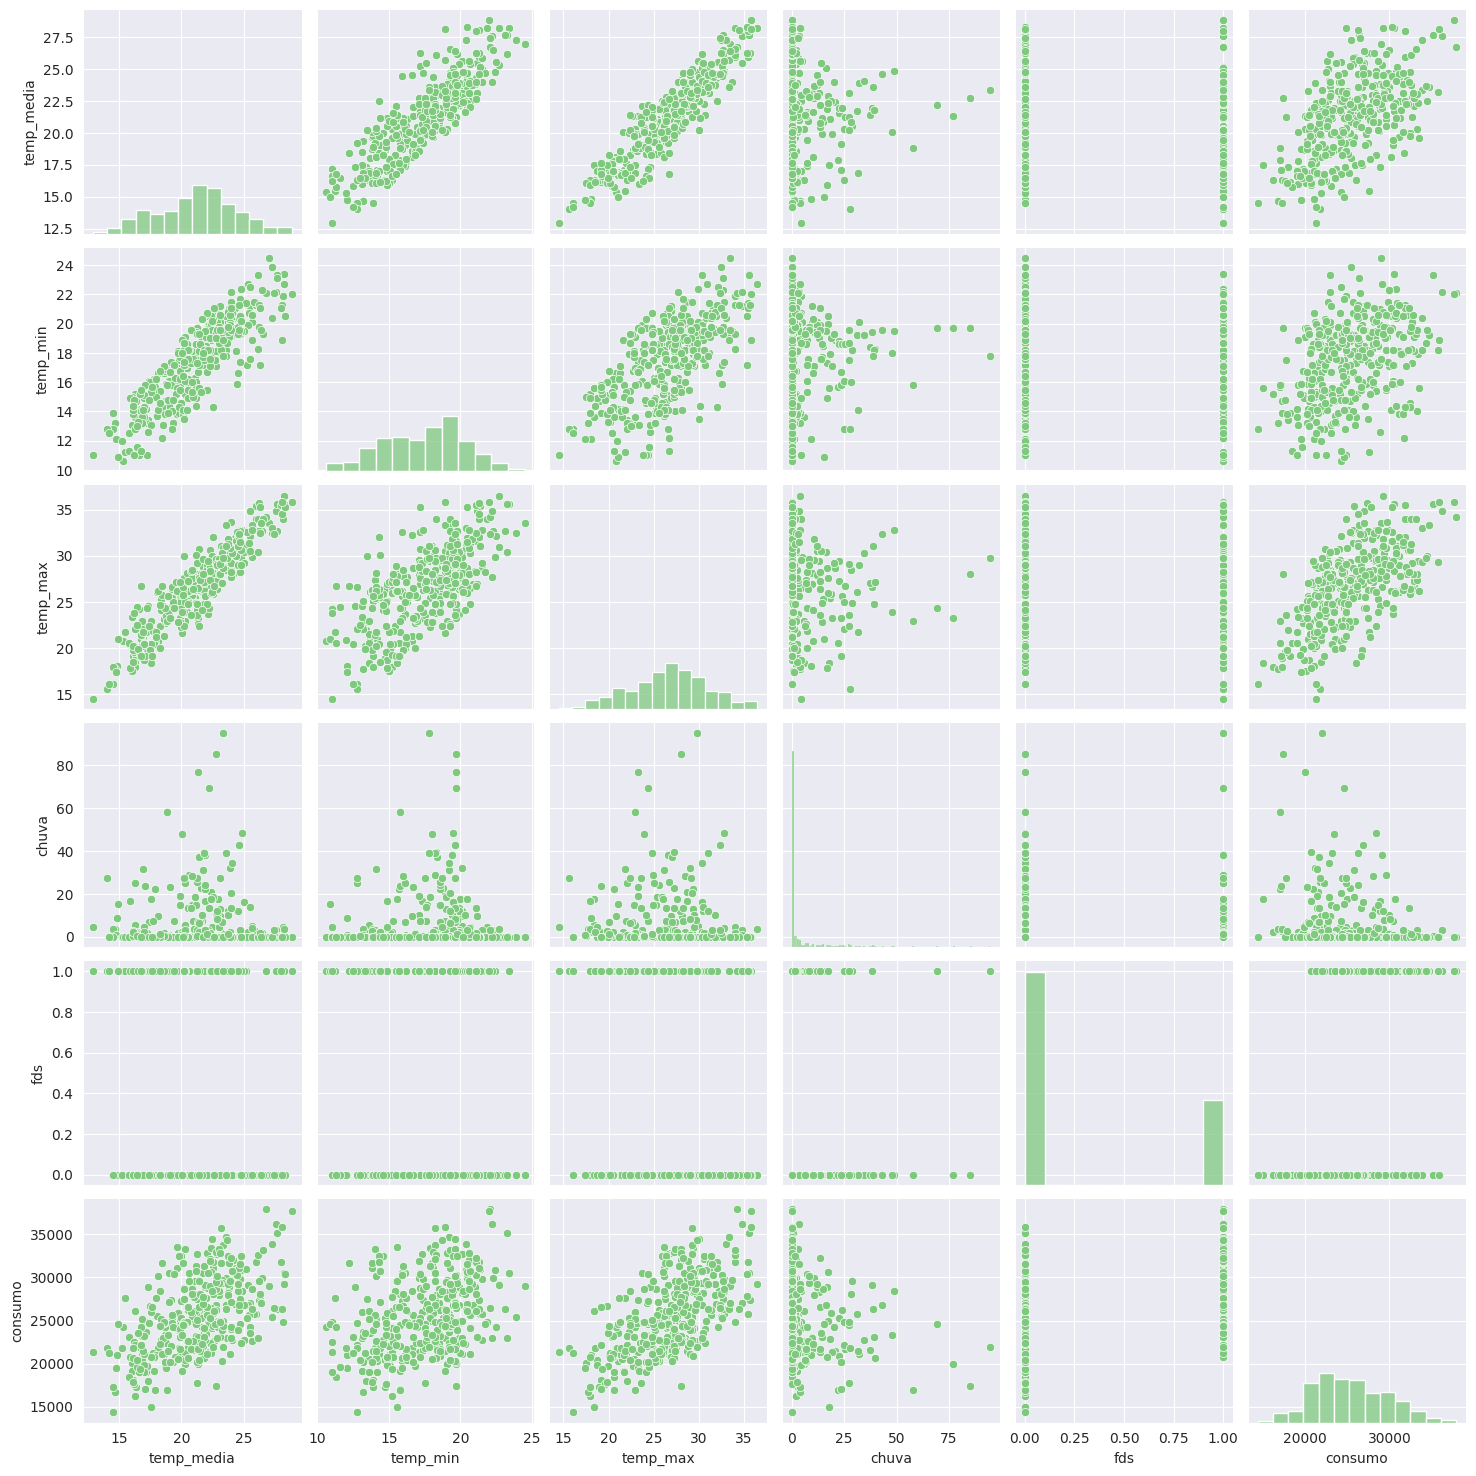

In [149]:
ax = sns.pairplot(dados)

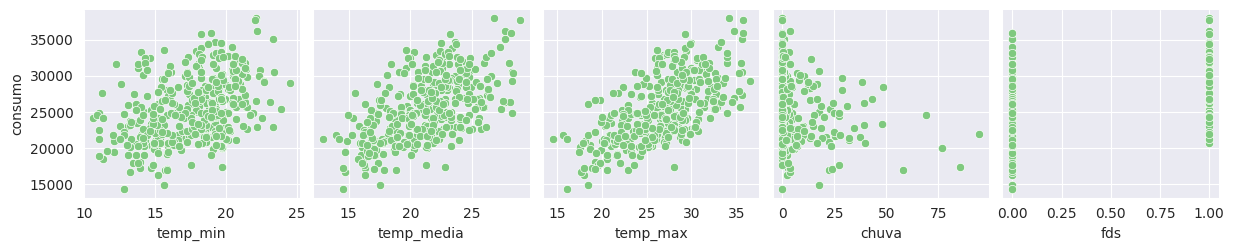

In [151]:
ax = sns.pairplot(dados, y_vars ='consumo', x_vars= ['temp_min','temp_media', 'temp_max', 'chuva','fds'])

- todas as variáveis de acordo com todas as informações que temos.

- vemos que com menos chuva, vende mais cerveja. e tambem temperaturas mais altas tem uma venda maior.

Text(0.5, 1.07, 'Dispersão entre as variáveis')

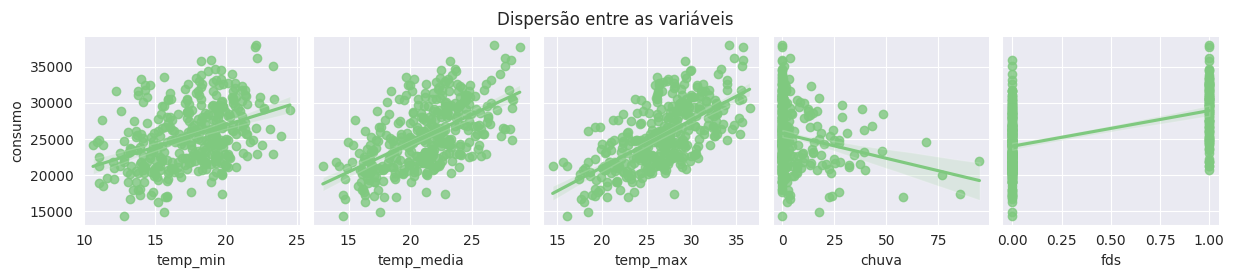

In [163]:
ax = sns.pairplot(dados, y_vars ='consumo', x_vars= ['temp_min','temp_media', 'temp_max', 'chuva','fds'], kind = 'reg')
ax.fig.suptitle('Dispersão entre as variáveis', y=1.07)  # titulo

- mostra a reta de tendencia